# 01 - Introduction to the session

In research and development (R&D), interactive computing environments are a frequently employed alternative for data exploration, algorithm development and prototyping. In the last twelve years, a popular scientific computing environment flourished around the Python programming language. Most of this environment is part of (or built over) a software stack named the SciPy Stack. Combined to the OpenCV’s Python interface, this environment becomes an alternative for current computer vision R&D. This tutorial introduces such an environment and shows how it can address different steps on computer vision 

## i- Why Python

![python.png](assets/python.png)


In the last twelve years, a powerful scientific computing environment emerged from the Python programming community. This language is an attractive option for researchers: it is interpreted (a wanted property for interactive computing environments), dynamically typed, and presents a very concise and elegant syntax, resembling the pseudo-code found in computer science textbooks. But the tipping point for Python to become a major player in scientific computing was the advent of an efficient module for  nn -dimensional array representation and manipulation. The Numarray module was created by Greenfield et al. to address astronomical data analysis. In 2005, Numarray successor, NumPy, appeared and became the workhorse of the Python scientific computing. 

**Python** is

- easy to learn
- faster than **Matlab and Stata**
- ever expanding Python Community
- Choice of data science libraries
    - Pandas, StatsModels, NumPy, SciPy, and Scikit-Learn
- **NumPy** module for $n$-dimensional arrays





## Let us dive into our topic of the day - COMPUTER VISION

### What is computer vision ?
In computer vision, the practitioner is interested in inferring the world state from images, that act as observations. The statistical relation between the world state and the observed images is defined by models. A particular model is defined by parameters, chosen by learning algorithms. Finally, the world state is estimated by inference algorithms.

#### Some High level sh\*t this is 

![image.png](assets/high.png)


#### To put it simply ,

#### <span style="color:rgb(231,123,18); font-family:Garamond; text-align:center; font-size:1.8em;">Computer vision is a field of computer science that makes computers to see, identify and process images in the same way that human vision does. </span>
<br>
<br>
![image.png](assets/vision.png)

<br>
<br>

## ii - Using IPython Shell

In [1]:
from math import pi 
r = 3.
2 * pi * r

# Press Shift+Enter to run the cell

18.84955592153876

In [2]:
# use command line arguments
! ls

1-intro.ipynb  assets  __init__.py  LICENSE  __pycache__  README.md  utility.py


Use magic command to know more about Ipython shell

In [3]:
%magic

## iii - Digital Image Processing

### 1 - Images as Grids of Pixels

In [4]:
# import resources
import numpy as np
import matplotlib.pyplot as plt  # for displaying image
import matplotlib.image as mpimg

import matplotlib.pyplot as plt
import cv2  # computer vision library

%matplotlib inline

Image dimensions: (168, 300, 3)


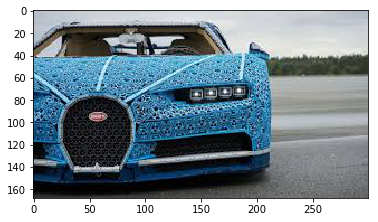

In [5]:
# Read in the image
image = mpimg.imread('assets/buggati.jpeg')

# Print out the image dimensions
print('Image dimensions:', image.shape)

plt.imshow(image)

### How Computer reads an image ?
<br>
<br>
As a refresher, images on computers are most often stored as big grids of pixels. These pixels are stored as multidimensional array. In python arrays are represented by a python only specialized datastructure numpy arrays.

<img src="assets/pixel.jpg" /> 





Each pixel is defined by a color , stored as a combination of three additive primary colors: **red, green and blue**. By combining different intensities of these three colors, we get something what is called as **RGB value**. Using these three colors we can represent any color.

<img src="assets/rgb.png" alt="rgb" height="420" width="420" />
<br>

***Lets check the sample matrix of the buggati image***


In [6]:
print("Images dimension:", image.shape)
print("data type of image matrix:", type(image))
# The value of pixels lie between 0 to 255
print(image)

Images dimension: (168, 300, 3)
data type of image matrix: <class 'numpy.ndarray'>
[[[185 192 202]
  [185 192 202]
  [186 193 203]
  ...
  [178 186 197]
  [178 186 197]
  [178 186 197]]

 [[185 192 202]
  [185 192 202]
  [185 192 202]
  ...
  [179 187 198]
  [179 187 198]
  [179 187 198]]

 [[184 191 201]
  [184 191 201]
  [185 192 202]
  ...
  [179 187 198]
  [179 187 198]
  [179 187 198]]

 ...

 [[ 49  49  47]
  [ 45  45  43]
  [ 42  42  40]
  ...
  [ 94  95  97]
  [ 93  94  96]
  [ 93  94  96]]

 [[ 54  54  52]
  [ 50  50  48]
  [ 47  47  45]
  ...
  [ 95  96  98]
  [ 95  96  98]
  [ 94  95  97]]

 [[ 55  55  53]
  [ 51  51  49]
  [ 48  48  46]
  ...
  [ 98  99 101]
  [ 97  98 100]
  [ 96  97  99]]]


### 2- Grayscale image

gray scale images are represented by 2-dimensional array , they do not have **RGB** intensities rather they have **Black & White** pixel intensities.

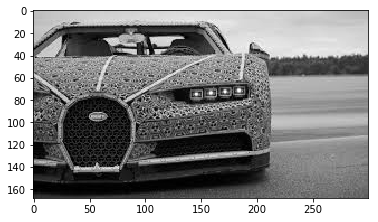

In [7]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')

In [8]:
# let us look at the gray scale images intensities
print("dimension of grayscale lego buggati:", gray_image.shape)
gray_image

dimension of grayscale lego buggati: (168, 300)


array([[191, 191, 192, ..., 185, 185, 185],
       [191, 191, 191, ..., 186, 186, 186],
       [190, 190, 191, ..., 186, 186, 186],
       ...,
       [ 49,  45,  42, ...,  95,  94,  94],
       [ 54,  50,  47, ...,  96,  96,  95],
       [ 55,  51,  48, ...,  99,  98,  97]], dtype=uint8)

### 3- Some other properties of an image

[[106 155 134 ...   7  21  10]
 [ 60 114 153 ...  17  18  12]
 [146 124 143 ...  26   9  16]
 ...
 [ 25  25  26 ...  72  75  68]
 [ 43  43  43 ...  70  77  68]
 [ 55  56  56 ...  80  89  79]]


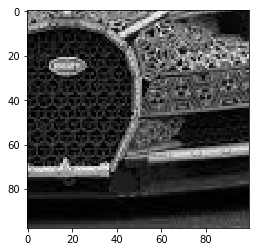

In [9]:
x = 40
y = 70

# roi -> region of interest
roi_image = gray_image[y: y+100,x: x+100]
print(roi_image)
plt.imshow(roi_image, cmap='gray')


### 4- Creation your own image

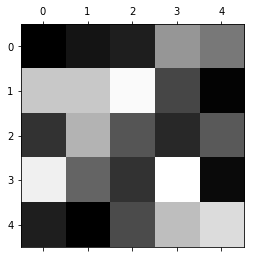

In [10]:
# Create a 5x5 image using just grayscale, numerical values
tiny_image = np.array([[0, 20, 30, 150, 120],
                      [200, 200, 250, 70, 3],
                      [50, 180, 85, 40, 90],
                      [240, 100, 50, 255, 10],
                      [30, 0, 75, 190, 220]])

# To show the pixel grid, use matshow
plt.matshow(tiny_image, cmap='gray')

<br>
### 5- Better Visualization for RGB channels

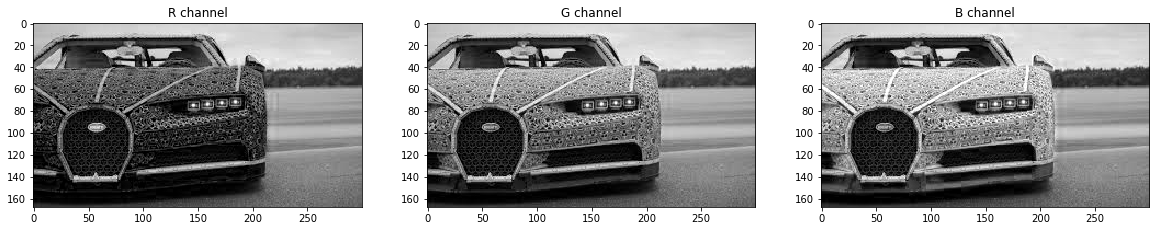

In [11]:
# Isolate RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')

## Which area has the lowest value for red? What about for blue?

### 6 - Drawing Bounding Boxes on Image
Learning how to add aditional things on an image is a necessary skill in the field of computer vision. Because this session is only introductory session , we will cover the topics which are only required further in this Session. For further learning you can refer to - https://www.meccanismocomplesso.org/en/english-opencv-python-drawing-shapes-text-on-images/

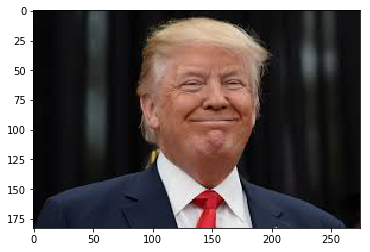

In [49]:
trump_img = mpimg.imread('assets/trump2.jpeg')
plt.imshow(trump_img)

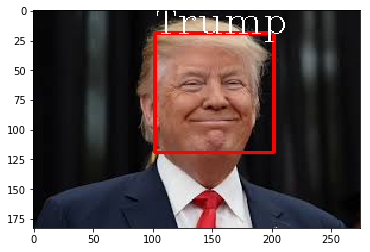

In [50]:
# using haar cascades to detect the face in the image and draw bounding box around it
# Haar cascades are advanced topics , therefore , we will not cover it in this session .
# You can always open a new tab and learn about it
face_cascade = cv2.CascadeClassifier('assets/face2.xml')
faces = face_cascade.detectMultiScale(trump_img, 1.3, 1)
(x, y, w, h) = faces[0]
bound_box = cv2.rectangle(trump_img, (x, y), (x + w , y + h), (255, 0, 0), 2)
cv2.putText(bound_box, "Trump",  (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 1)
plt.imshow(trump_img)

In [51]:
# Represets x,y and height, width of an image
faces


array([[102,  19, 100, 100]], dtype=int32)